In [32]:
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
from numpy import linspace
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import seaborn as sb
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [33]:
# physical constants for natural units c = G = 1
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [34]:
'params'

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True}

# functions which will normalize the bins

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


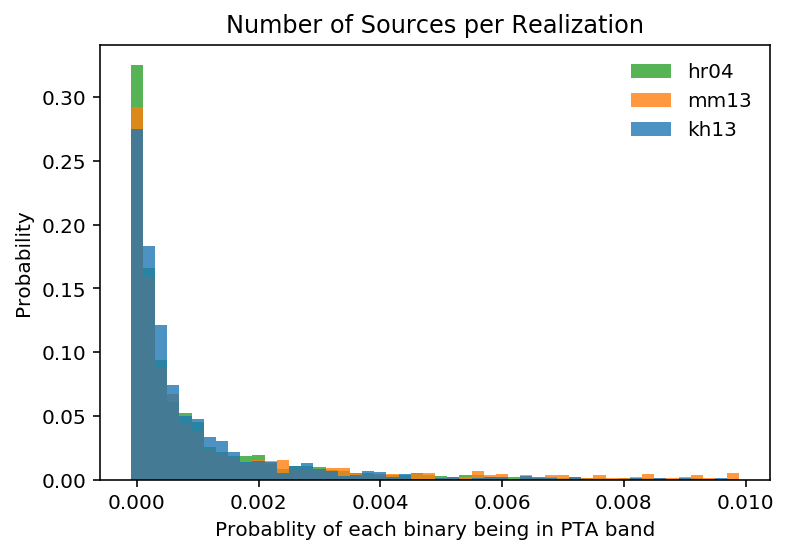

In [72]:
#kh13 probablity of each binary being in PTA band
kh13prob = []
for i in range(100):
        filenamekh = "test_sources/KH13/test02/kh13Test_"+str(i)+"_test"
        kh13prob = np.hstack((kh13prob, np.genfromtxt(filenamekh,  usecols=(9), dtype='float')))

mm13prob = []
for i in range(10):
        filenamemm = "test_sources/MM13/test01/mm13Test_"+str(i)+"_test"
        mm13prob = np.hstack((mm13prob, np.genfromtxt(filenamemm,  usecols=(9), dtype='float')))

hr04prob = []
for i in range(10):
        filenamehr = "test_sources/HR04/test01/hr04Test_"+str(i)+"_test"
        hr04prob = np.hstack((hr04prob, np.genfromtxt(filenamehr,  usecols=(9), dtype='float')))
        
#weight
weightkh = hist_weight(kh13prob)
weightmm = hist_weight(mm13prob)
weighthr = hist_weight(hr04prob)

#bins
bin_kh13 = auto_bin(0.0002, 0, 0.01)
bin_mm13 = auto_bin(0.0002, 0, 0.01)
bin_hr04 = auto_bin(0.0002, 0, 0.01)

#plot
plt.hist(hr04prob,bins = bin_hr04, weights=weighthr, alpha = 0.8, align='left', color = 'C2', label = "hr04")
plt.hist(mm13prob,bins = bin_mm13, weights=weightmm, alpha = 0.8, align='left', color = 'C1', label = "mm13")
plt.hist(kh13prob,bins = bin_kh13, weights=weightkh, alpha = 0.8, align='left', color = 'C0', label = "kh13")

#style
plt.xlabel("Probablity of each binary being in PTA band")
plt.ylabel("Probability")
plt.title("probablity of each binary being in PTA band")
plt.legend(frameon=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


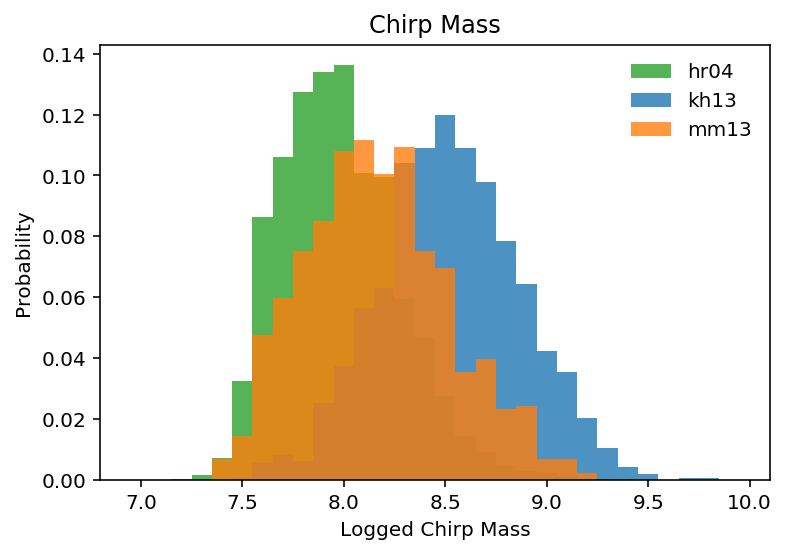

In [85]:
#kh13 chirp mass
kh13mc = []
for i in range(100):
        filenamekh = "test_sources/KH13/test02/kh13Test_"+str(i)+"_test"
        kh13mc = np.hstack((kh13mc, np.genfromtxt(filenamekh,  usecols=(4), dtype='float')))

mm13mc = []
for i in range(10):
        filenamemm = "test_sources/MM13/test01/mm13Test_"+str(i)+"_test"
        mm13mc = np.hstack((mm13mc, np.genfromtxt(filenamemm,  usecols=(4), dtype='float')))

hr04mc = []
for i in range(10):
        filenamehr = "test_sources/HR04/test01/hr04Test_"+str(i)+"_test"
        hr04mc = np.hstack((hr04mc, np.genfromtxt(filenamehr,  usecols=(4), dtype='float')))


        
#logged mass       
kh13mc = log10(kh13mc)
mm13mc = log10(mm13mc)
hr04mc = log10(hr04mc)

#weight
weightkhmc = hist_weight(kh13mc)
weightmmmc = hist_weight(mm13mc)
weighthrmc = hist_weight(hr04mc)


#bins
bin_khmc = auto_bin(0.1, 7, 10)
bin_mmmc = auto_bin(0.1, 7, 10)
bin_hrmc = auto_bin(0.1, 7, 10)

#plot
plt.hist(hr04mc,bins = bin_hrmc, weights=weighthrmc, alpha = 0.8, align='left', color = 'C2', label = "hr04")
plt.hist(kh13mc,bins = bin_khmc, weights=weightkhmc, alpha = 0.8, align='left', color = 'C0', label = "kh13")
plt.hist(mm13mc,bins = bin_mmmc, weights=weightmmmc, alpha = 0.8, align='left', color = 'C1', label = "mm13")


#style
plt.xlabel("Logged Chirp Mass")
plt.ylabel("Probability")
plt.title("Chirp Mass")
plt.legend(frameon=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


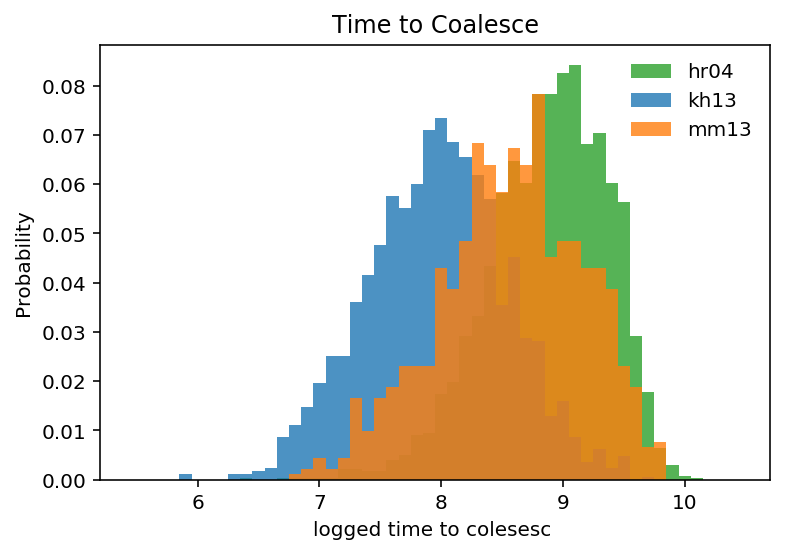

In [81]:
#time to coalesce
kh13col = []
for i in range(100):
        filenamekh = "test_sources/KH13/test02/kh13Test_"+str(i)+"_test"
        kh13col = np.hstack((kh13col, np.genfromtxt(filenamekh,  usecols=(13), dtype='float')))

mm13col = []
for i in range(10):
        filenamemm = "test_sources/MM13/test01/mm13Test_"+str(i)+"_test"
        mm13col = np.hstack((mm13col, np.genfromtxt(filenamemm,  usecols=(13), dtype='float')))

hr04col = []
for i in range(10):
        filenamehr = "test_sources/HR04/test01/hr04Test_"+str(i)+"_test"
        hr04col = np.hstack((hr04col, np.genfromtxt(filenamehr,  usecols=(13), dtype='float')))


#logged time
kh13col = log10(kh13col)
mm13col = log10(mm13col)
hr04col = log10(hr04col)

#weight
weightkhcol = hist_weight(kh13col)
weightmmcol = hist_weight(mm13col)
weighthrcol = hist_weight(hr04col)


#bins
bin_khcol = auto_bin(0.1, 5.5, 10.5)
bin_mmcol = auto_bin(0.1, 5.5, 10.5)
bin_hrcol = auto_bin(0.1, 5.5, 10.5)

#plot
plt.hist(hr04col, bins = bin_hrcol, weights=weighthrcol, alpha = 0.8, align='left', color = 'C2', label = "hr04")
plt.hist(kh13col, bins = bin_khcol, weights=weightkhcol, alpha = 0.8, align='left', color = 'C0', label = "kh13")
plt.hist(mm13col, bins = bin_mmcol, weights=weightmmcol, alpha = 0.8, align='left', color = 'C1', label = "mm13")


#style
plt.xlabel("logged time to colesesc ")
plt.ylabel("Probability")
plt.title("Time to Coalesce")
plt.legend(frameon=False)

khmean  16.34


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


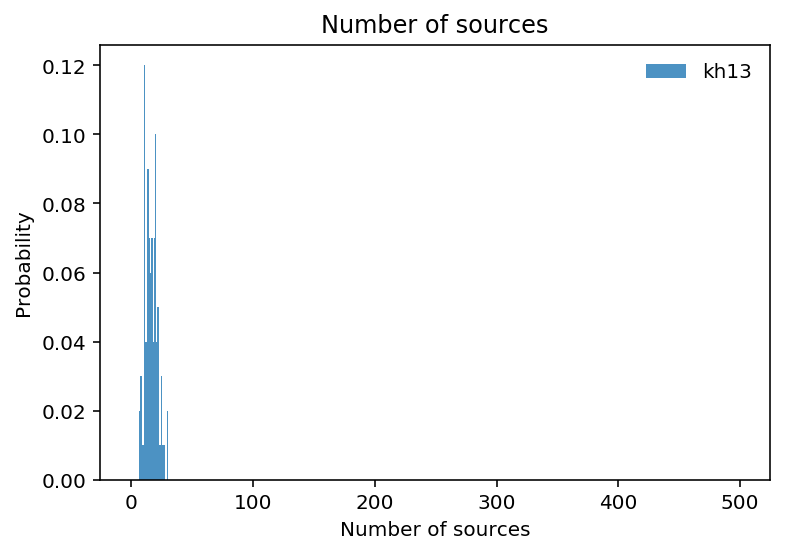

In [87]:
#number of sources
kh13Sources =  [14, 13, 20, 11, 17, 8, 16, 11, 20, 14, 20, 14, 15, 16, 7, 17, 16, 15, 18, 20, 14, 25, 11, 15, 19, 30, 11, 19, 12, 17, 21, 22, 12, 20, 18, 25, 19, 19, 11, 17, 7, 22, 19, 12, 13, 27, 8, 13, 12, 22, 11, 19, 18, 13, 14, 13, 13, 22, 16, 20, 13, 17, 11, 14, 11, 15, 20, 14, 26, 14, 13, 15, 15, 19, 11, 25, 13, 30, 21, 20, 21, 21, 17, 17, 9, 20, 18, 10, 11, 20, 24, 14, 15, 8, 22, 23, 11, 11, 16, 16]
khmean = np.mean(kh13Sources)
print("khmean " , khmean)
#weight
weightkhsource = hist_weight(kh13Sources)

#bins
bin_khsource = auto_bin(1, 0, 500)

#plot
plt.hist(kh13Sources, bins = bin_khsource, weights=weightkhsource, alpha = 0.8, align='left', color = 'C0', label = "kh13")

#style
plt.xlabel("Number of sources")
plt.ylabel("Probability")
plt.title("Number of sources")
plt.legend(frameon=False)




